In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Defining Parameters

In [27]:
# Parameters
N = 64

# Gaussian random field
def Gaussian(n):
  return np.random.normal(0, 1, (n, n, n))

# Making a filter
def spherical_mask(radius, n, norm):
    origin = n // 2 - 1
    x, y, z = np.meshgrid(np.arange(n) - origin, np.arange(n) - origin, np.arange(n) - origin)

    # Matrix
    M = np.where(np.sqrt(x**2 + y**2 + z**2) <= radius, 1.0, 0.0)

    # Normalization condition
    if norm == 0:
      return M
    elif norm == 1:
      return M/(np.sum(M))
    else:
      raise ValueError(f"No method type {norm}")

# Convolution
def Convolution(grid,mask):
  # Fourier transform of the grid
  F_grid = np.fft.fftn(grid)
  # Shifting the origin
  F_grid_shift = np.fft.fftshift(F_grid)

  # Fourier transform of mask
  F_Filter = np.fft.fftn(mask)
  # Shifting the origin
  F_Filter_shift = np.fft.fftshift(F_Filter)


  ## Product in Fourier space and shifting origin
  F_grid_Filter_shift = (F_grid_shift * F_Filter_shift)

  # Taking inverse FT of product
  inv_F_product = np.fft.ifftn(F_grid_Filter_shift)
  return inv_F_product

# Function that does all the plotting
def Plot_3D(array,n,Title,style = "Spectral"):

  # Creating meshgrid
  x = np.linspace(-10,10,n,endpoint = True)
  y = np.linspace(-10,10,n,endpoint = True)
  z = np.linspace(-10,10,n,endpoint = True)

  X, Y, Z = np.meshgrid(x,y,z)

  # Plotting
  fig = plt.figure(figsize = (8,8))
  ax = fig.add_subplot(111, projection = "3d")
  scatter = ax.scatter(X.flatten(), Y.flatten(), Z.flatten(), c = array, cmap = style)
  fig.colorbar(scatter)
  plt.title(Title)
  plt.show()

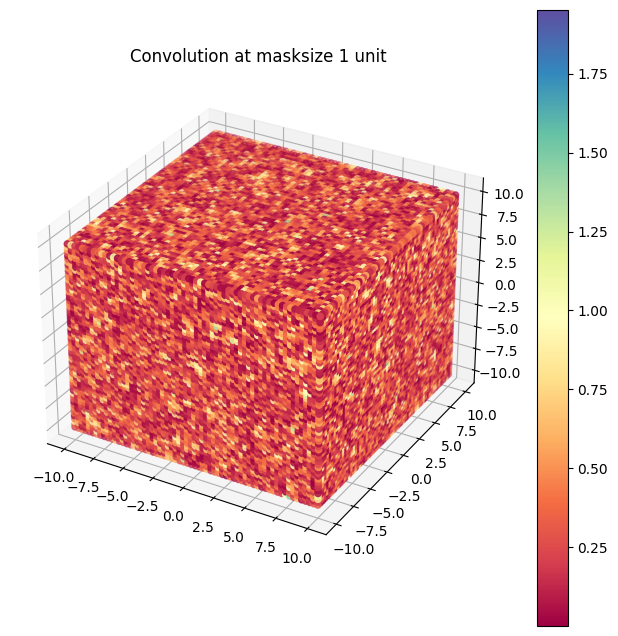

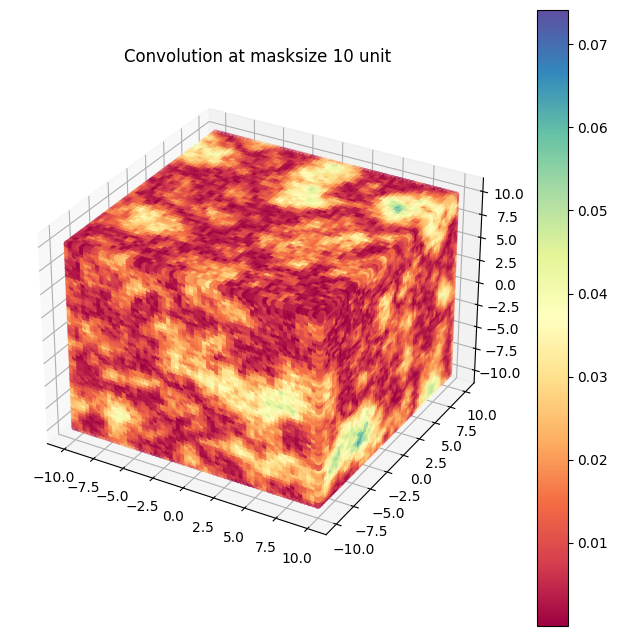

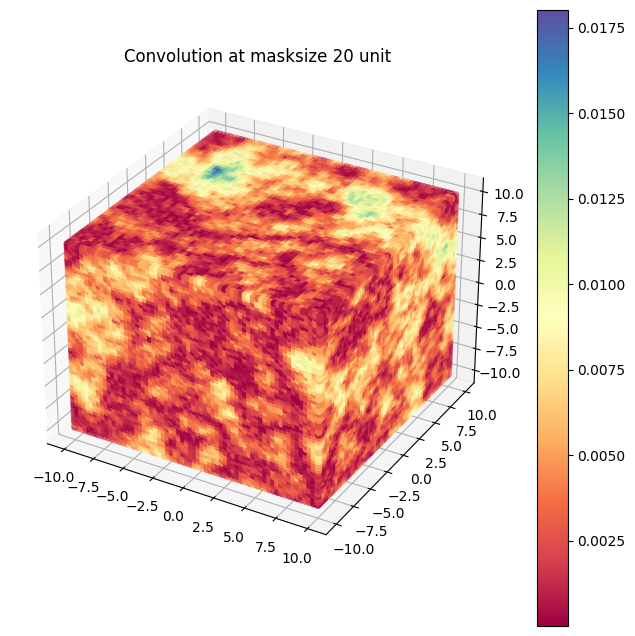

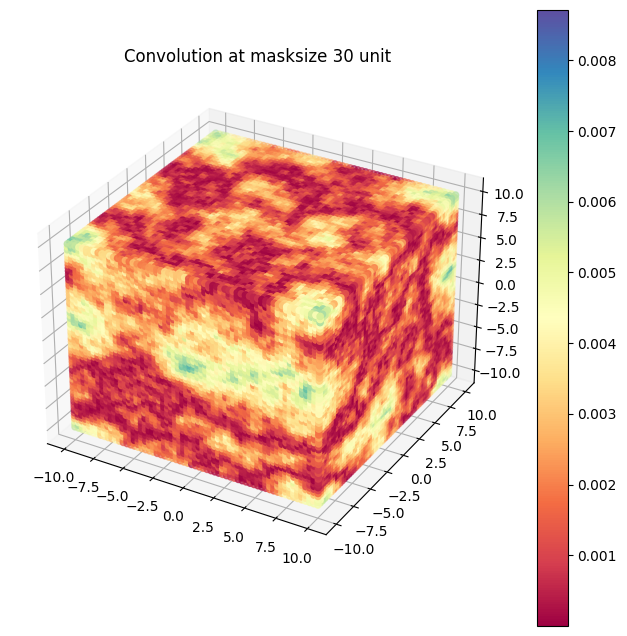

In [39]:
size = [1,10,20,30]
for i in size:
  Plot_3D(np.abs(Convolution(Gaussian(N),spherical_mask(i,N,1))),N,f"Convolution at masksize {i} unit")

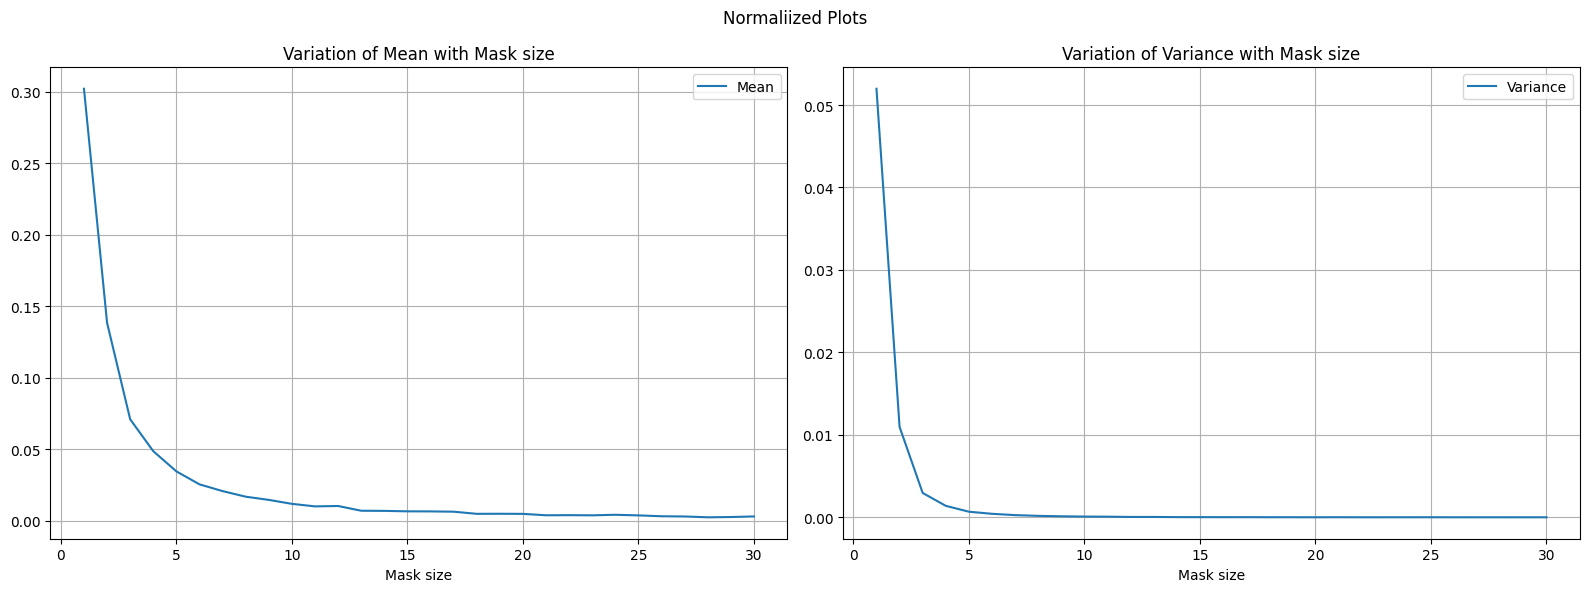

In [37]:
x = np.linspace(1,30,30)
Mean = []
Variance = []
for i in range(1,31):
  a = np.mean(np.abs(Convolution(Gaussian(N),spherical_mask(i,N,1))))
  b = np.var(np.abs(Convolution(Gaussian(N),spherical_mask(i,N,1))))
  Mean.append(a)
  Variance.append(b)

plt.figure(figsize = (16, 6))
plt.suptitle("Normaliized Plots")

plt.subplot(1, 2, 1)
plt.plot(x, Mean, label = "Mean")
plt.xlabel("Mask size")
plt.title("Variation of Mean with Mask size")
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, Variance, label = "Variance")
plt.xlabel("Mask size")
plt.title("Variation of Variance with Mask size")
plt.grid()
plt.legend()

plt.tight_layout()  
plt.show()

In [3]:
## No need to normalize as patterns obtained are more or less similar (Energy conservation is the reason to do normalizartion). 
# The trend of mean an standard deviation changes while normalization is kept on to that when kept off. After some point, it saturates (size of the problem)?

## Periodic boundary conditions assumed indirectly to make the convolution work.(Values at boundaries is required to operate at the boundaries.) 